Data loaded successfully. Shape: (730, 11)


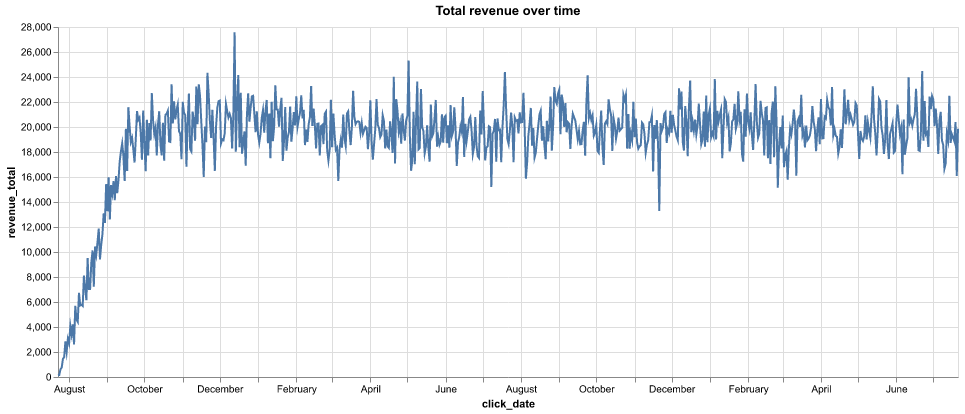

In [11]:
import altair as alt
import pandas as pd

# Make Altair embed PNGs directly into the notebook outputs
alt.data_transformers.disable_max_rows()
alt.renderers.enable("png")  # requires vl-convert-python

# Load data (relative to your notebook location)
data_path = '../data/mmm_daily_agg.csv'
mm = pd.read_csv(data_path, parse_dates=['click_date']).sort_values('click_date')
print(f"Data loaded successfully. Shape: {mm.shape}")

# Total revenue over time
revenue_chart = (
    alt.Chart(mm)
    .mark_line()
    .encode(x='click_date:T', y='revenue_total:Q')
    .properties(title='Total revenue over time', width=900, height=350)
)

revenue_chart  # <-- leaving the chart variable last in the cell displays it inline as PNG

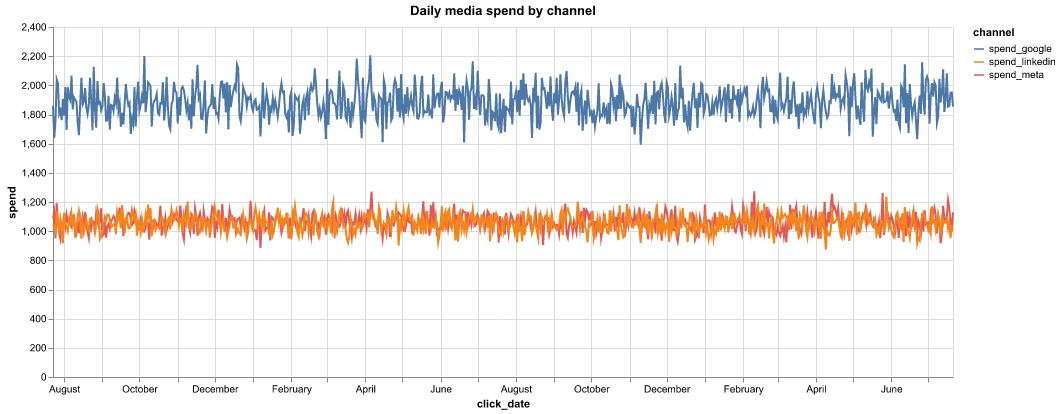

In [12]:
# Spend per channel over time
spend_df = mm.melt(
    id_vars=['click_date'],
    value_vars=['spend_google', 'spend_meta', 'spend_linkedin'],
    var_name='channel', value_name='spend'
)

spend_chart = (
    alt.Chart(spend_df)
    .mark_line()
    .encode(x='click_date:T', y='spend:Q', color='channel:N')
    .properties(title='Daily media spend by channel', width=900, height=350)
)

spend_chart  # displayed inline as PNG